In [57]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb


In [58]:
prices=pd.DataFrame()

prices=wb.DataReader('ITSA4.SA', data_source='yahoo', start='2010-1-1').reset_index()

In [63]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2581 non-null   datetime64[ns]
 1   High       2581 non-null   float64       
 2   Low        2581 non-null   float64       
 3   Open       2581 non-null   float64       
 4   Close      2581 non-null   float64       
 5   Volume     2581 non-null   float64       
 6   Adj Close  2581 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.3 KB


In [64]:
prices.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2581.000000,2581.000000,2581.000000,2581.000000,2.581000e+03,2581.000000
mean,8.032821,7.833654,7.938278,7.937011,1.970895e+07,6.168410
std,2.417755,2.372995,2.398774,2.395703,1.076308e+07,2.959638
min,4.843360,4.478860,4.666630,4.583790,0.000000e+00,2.755888
25%,6.271590,6.100130,6.193530,6.193530,1.312002e+07,3.959497
50%,7.101770,6.897450,6.999760,7.002200,1.785985e+07,4.788179
75%,9.363640,9.090000,9.218180,9.260000,2.393517e+07,8.109108
max,14.380000,14.120000,14.200000,14.350000,1.169007e+08,14.049962


In [66]:
# Calcula variação do dia
prices['Variation'] =prices['Close'].sub(prices['Open'])

In [67]:
prices

,Date,High,Low,Open,Close,Volume,Adj Close,Variation
0,2010-01-04,6.81670,6.55791,6.55791,6.81120,9604588.0,4.007836,0.25329
1,2010-01-05,6.86075,6.72310,6.84974,6.78917,9147468.0,3.994874,-0.06057
2,2010-01-06,6.82221,6.69557,6.76715,6.70658,9212667.0,3.946275,-0.06057
3,2010-01-07,6.71209,6.61297,6.69006,6.66804,7699834.0,3.923598,-0.02202
4,2010-01-08,6.69006,6.58544,6.64601,6.61848,8116635.0,3.894438,-0.02753
...,...,...,...,...,...,...,...,...
2576,2020-06-12,9.87000,9.55000,9.70000,9.79000,47426700.0,9.790000,0.09000
2577,2020-06-15,9.73000,9.41000,9.46000,9.56000,30138200.0,9.560000,0.10000
2578,2020-06-16,9.92000,9.65000,9.89000,9.76000,22358100.0,9.760000,-0.13000
2579,2020-06-17,10.06000,9.76000,9.81000,9.93000,27115900.0,9.930000,0.12000


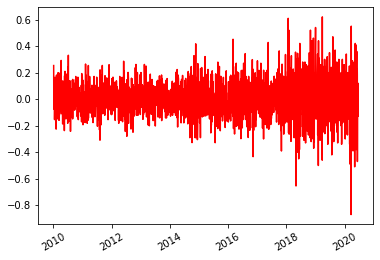

In [71]:
# Variação do preco ao longo dos anos

import matplotlib.dates as mdates
import datetime as dt

x = prices['Date']
y = prices['Variation']

plt.plot_date(x,y, color='r',fmt="r-")
plt.xticks(rotation=30)

plt.show()

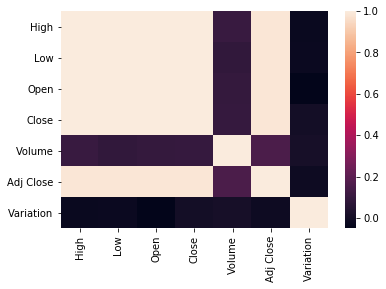

In [73]:
sns.heatmap(prices.corr())

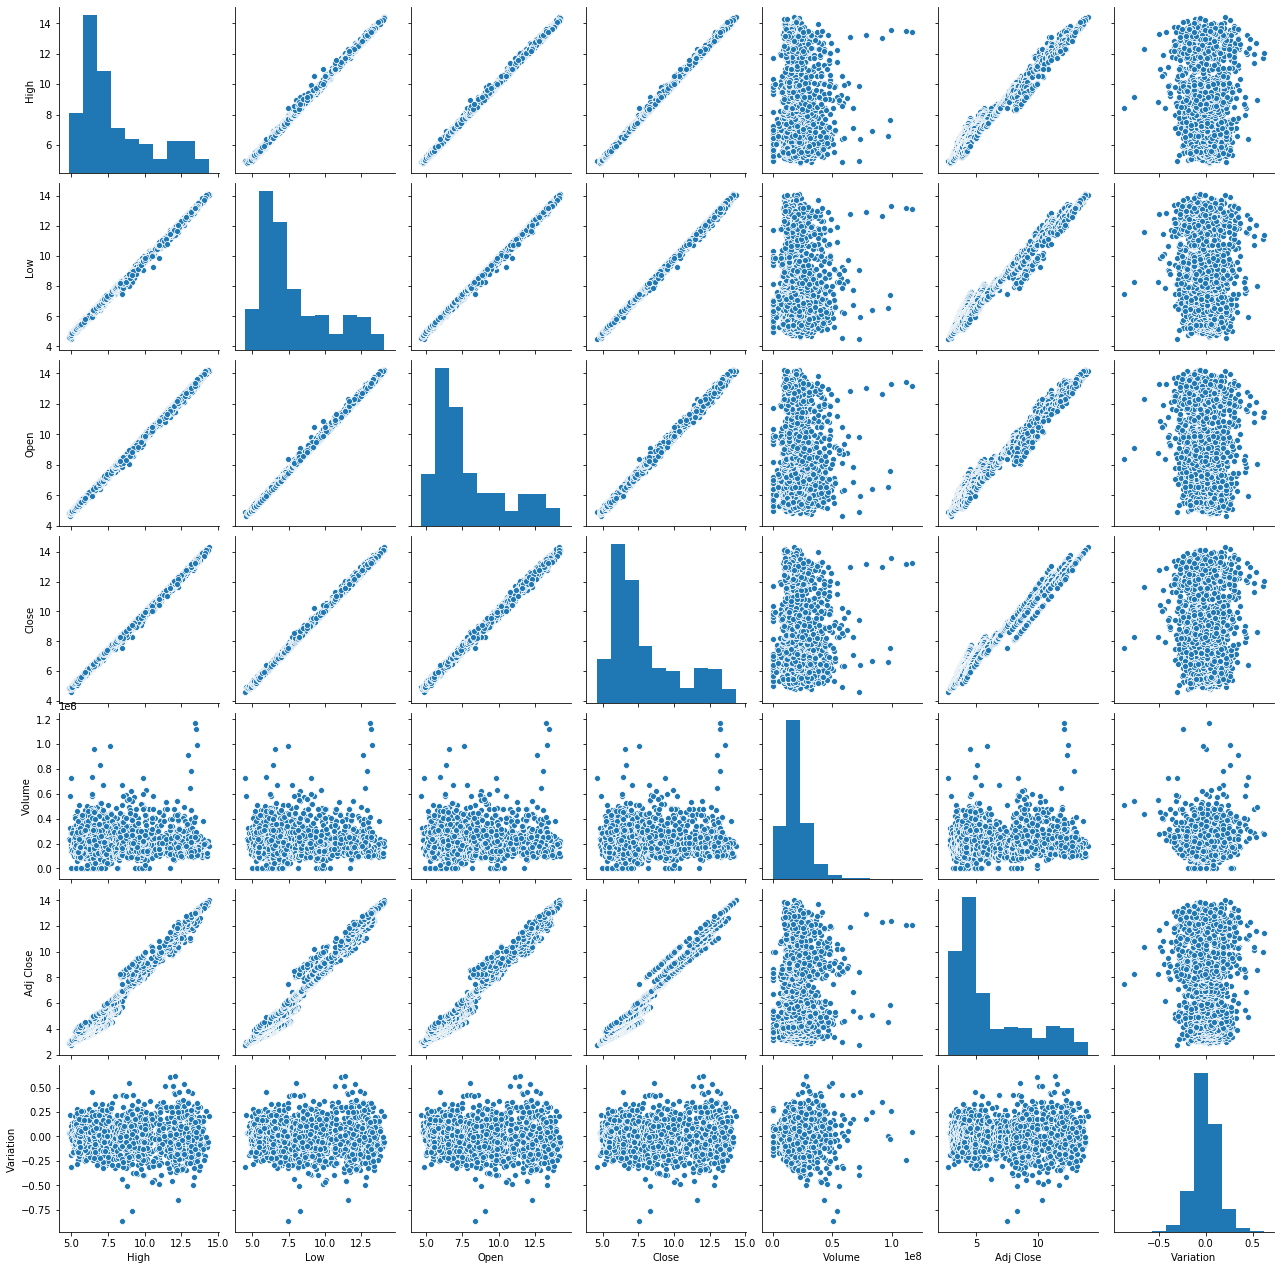

In [75]:
sns.pairplot(prices)

In [81]:
X = prices[['Open','High','Low','Volume']]


In [82]:
y = prices['Close']

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Treino

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [96]:
# previsões
Y_prev = reg.predict(X_test)

In [93]:
# R2 explica o quanto meus modelo explica os dados

r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 1.00
R2 no set de teste: 1.00


In [97]:
# O Erro Médio Absoluto é a soma de todos esses erros divido pelo número de pontos.

from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')

MAE 0.045271229160272354


In [99]:
#O Erro Médio Quadrático tem como base o Erro Médio Absoluto, contudo, o erro (distância entre os pontos e a reta) é elevado ao quadrado.
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

MSE 0.003472571597797688


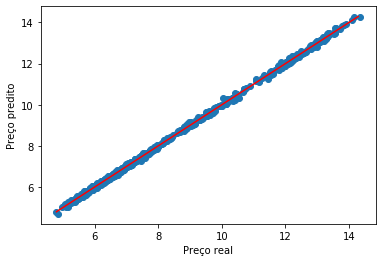

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Preço real')
plt.ylabel('Preço predito')
plt.show()

O modelo consegue prever o fechamento tendo valores de abertura, maxima, minima e volume,
Mas e se eu tivesse apenas a informação da abertura, será que o modelo performaria?

In [110]:
# è necessário ajustar os meu dados de X a uma matriz, isso é pré-requisito do SKlearn =)
y = prices['Close']
X=prices['Open'].values.reshape((len(y)),1)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# Treino
reg = LinearRegression().fit(X_train,y_train)

In [113]:
# previsões
Y_prev = reg.predict(X_test)

In [114]:
# R2 explica o quanto meus modelo explica os dados

r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 1.00
R2 no set de teste: 1.00


In [115]:
# O Erro Médio Absoluto é a soma de todos esses erros divido pelo número de pontos.

from sklearn.metrics import mean_absolute_error
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')

MAE 0.09775276213172232


In [116]:
#O Erro Médio Quadrático tem como base o Erro Médio Absoluto, contudo, o erro (distância entre os pontos e a reta) é elevado ao quadrado.
from sklearn.metrics import mean_squared_error
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

MSE 0.017016021312171455


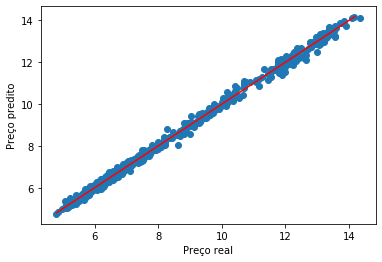

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Preço real')
plt.ylabel('Preço predito')
plt.show()